# Part 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [2]:
wine = datasets.load_wine()
df_wine = pd.DataFrame(data= np.c_[wine['data'], wine['target']],
                     columns= wine['feature_names'] + ['target'])
df_wine.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


## Standardizing Data - Features (Alcohol and Total Phenols)

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
df_wine_X = df_wine.iloc[:,:-1] # features

df_wine_X.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
standard_scaler = StandardScaler()
standard_scaler.fit_transform(df_wine_X)
wine_standard = standard_scaler.fit_transform(df_wine_X)
df_wine_standard = pd.DataFrame(data=wine_standard[0:,0:],    # values
             #index=wine_df_mm[1:,0],    # 1st column as index
             columns=df_wine_X.columns)
df_wine_standard.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,7.943708e-15,3.592632e-16,-4.066660e-15,-7.983626e-17,-7.983626e-17,-3.991813e-17,9.979533e-16,-5.588538e-16,-1.656602e-15,-3.442939e-16,1.636643e-15,2.235415e-15,-1.197544e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


### Histogram for Alcohol

Text(0.5, 1.0, 'Histogram after \nStandardizing Data')

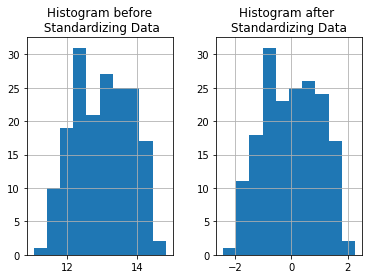

In [6]:
fig, axes = plt.subplots(1, 2)

df_wine.hist('alcohol', ax=axes[0])
df_wine_standard.hist('alcohol', ax=axes[1])
axes[0].set_title('Histogram before\n Standardizing Data')
axes[1].set_title('Histogram after \nStandardizing Data')

# plt.hist(df_wine_standard['alcohol'])

### Histogram for Total Phenols

Text(0.5, 1.0, 'Histogram after \nStandardizing Data')

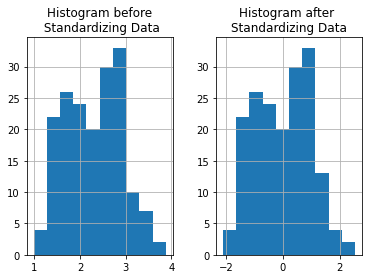

In [7]:
fig, axes = plt.subplots(1, 2)

df_wine.hist('total_phenols', ax=axes[0])
df_wine_standard.hist('total_phenols', ax=axes[1])
axes[0].set_title('Histogram before\n Standardizing Data')
axes[1].set_title('Histogram after \nStandardizing Data')

### Box Plots for Alcohol

Text(0.5, 1.0, 'BoxPlot after \nStandardizing Data')

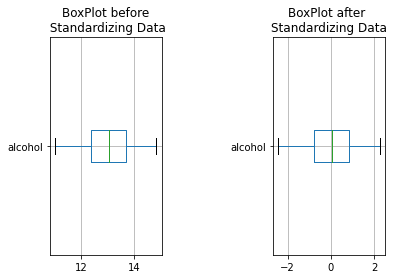

In [8]:
fig, axes = plt.subplots(1, 2)
plt.subplots_adjust(wspace = 1)

df_wine.boxplot('alcohol', ax=axes[0], vert = False)
df_wine_standard.boxplot('alcohol', ax=axes[1], vert = False)
axes[0].set_title('BoxPlot before\n Standardizing Data')
axes[1].set_title('BoxPlot after \nStandardizing Data')

Text(0.5, 1.0, 'BoxPlot after \nStandardizing Data')

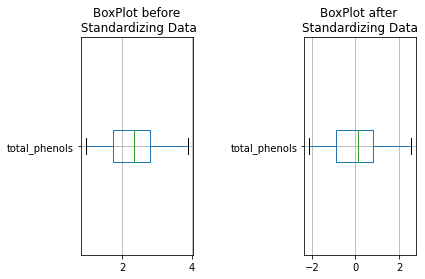

In [9]:
fig, axes = plt.subplots(1, 2)
plt.subplots_adjust(wspace = 1)

df_wine.boxplot('total_phenols', ax=axes[0], vert = False)
df_wine_standard.boxplot('total_phenols', ax=axes[1], vert = False)
axes[0].set_title('BoxPlot before\n Standardizing Data')
axes[1].set_title('BoxPlot after \nStandardizing Data')

### Pair Plots before and after standardization

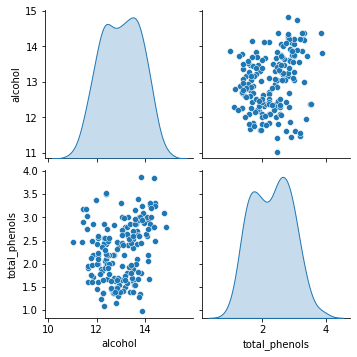

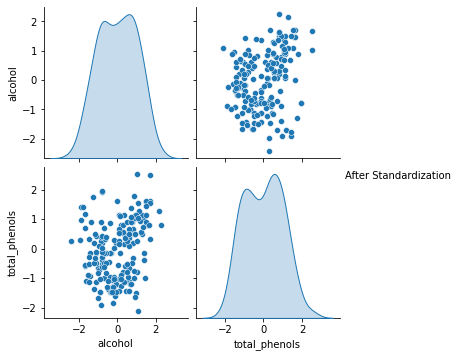

In [10]:
sns.pairplot(df_wine, vars = ['alcohol','total_phenols'], diag_kind="kde")
sns.pairplot(df_wine_standard, vars = ['alcohol','total_phenols'], diag_kind="kde").add_legend(title = 'After Standardization')

## Histogram for all attributes across all attributes

<AxesSubplot:ylabel='Frequency'>

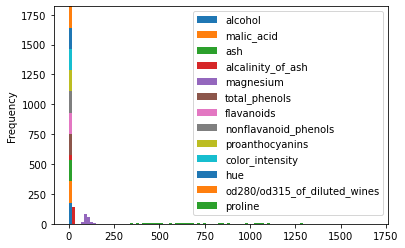

In [11]:
df_wine_X.plot.hist(bins = 100, stacked = True)

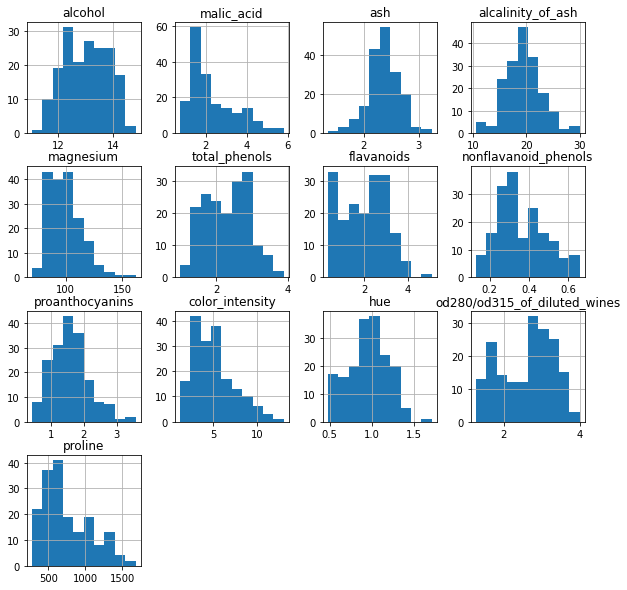

In [12]:
cols = df_wine_X.columns
df_wine_X.hist(column = cols,  figsize = (10,10))
plt.show()

# Part 2

## Pairplot of all the attributes

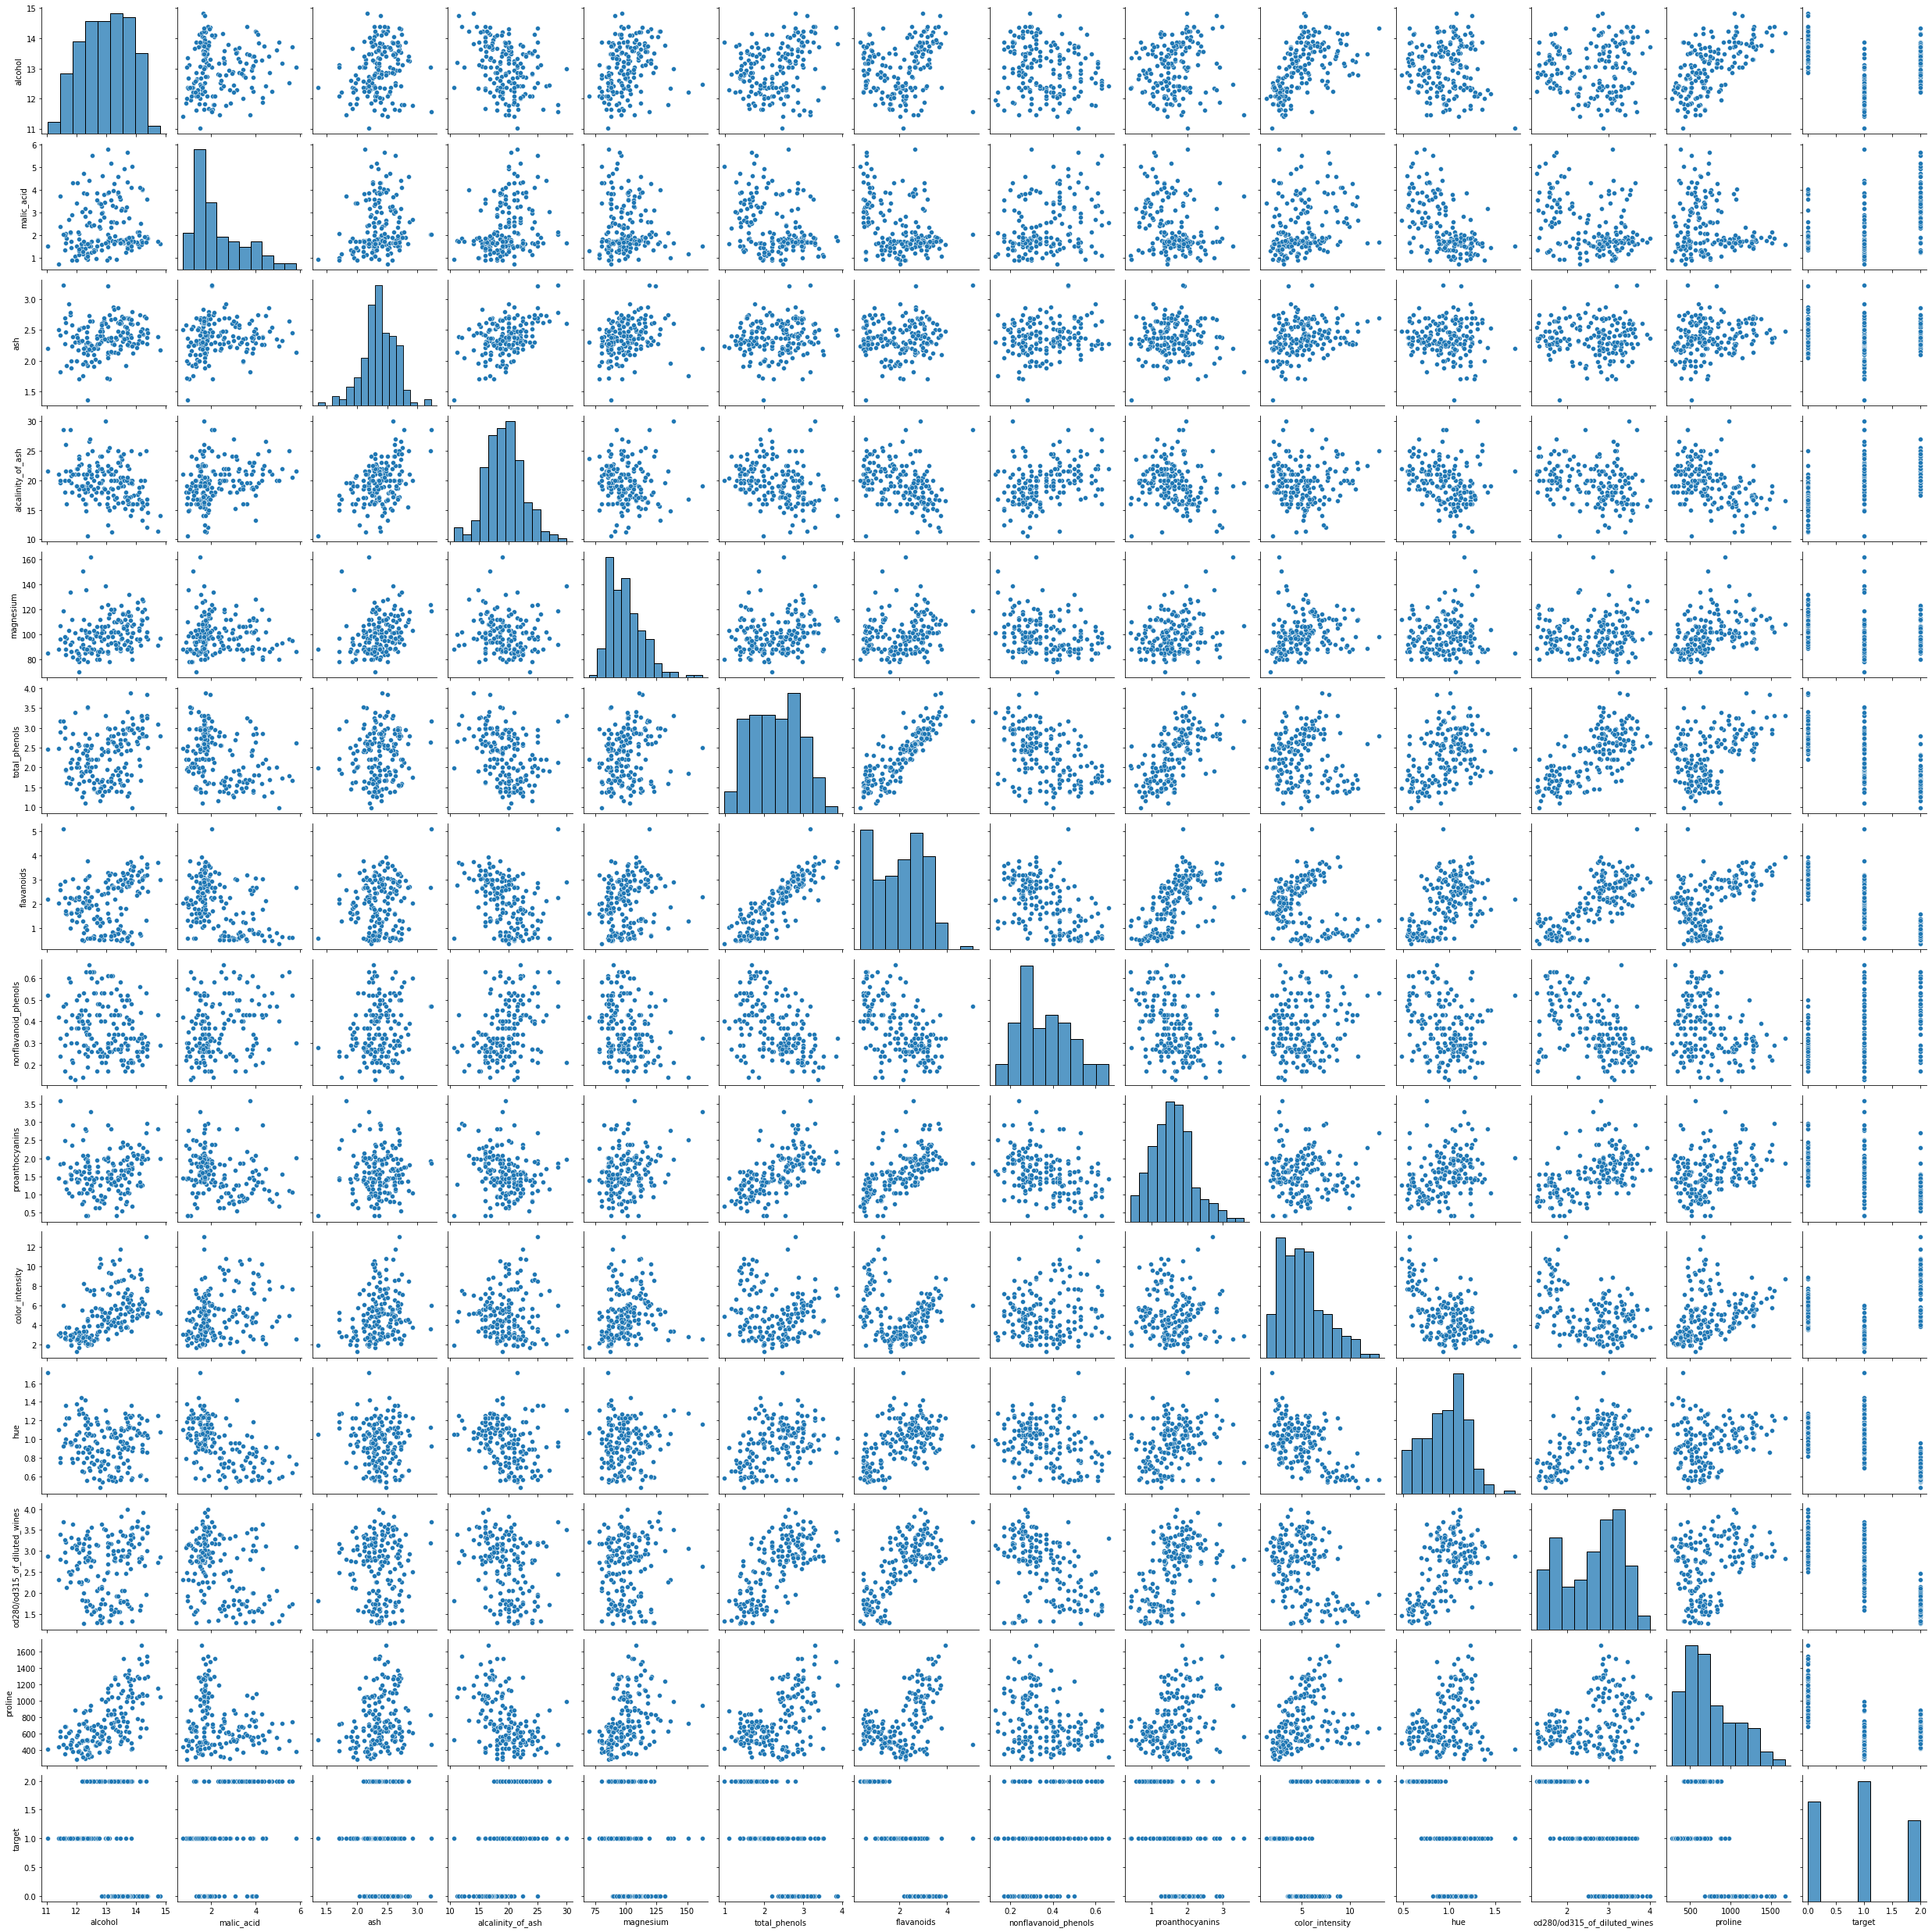

In [13]:
sns.pairplot(df_wine)

### As per the above pair plot, selecting Total_Phenols and Flavanoids and plotting Linear Regression line

<AxesSubplot:xlabel='flavanoids', ylabel='total_phenols'>

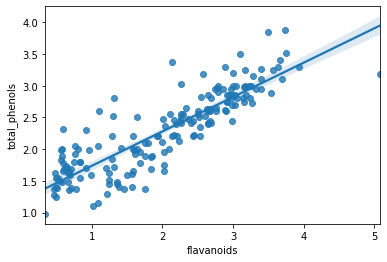

In [14]:
sns.regplot(x = df_wine['flavanoids'], y = df_wine['total_phenols'], data = df_wine)

### Computing Linear Regression model using Sklearn

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from yellowbrick.regressor import residuals_plot

df_wine_regr_X = df_wine['flavanoids'].values.reshape(178,1)
df_wine_regr_y = df_wine['total_phenols'].values.reshape(178,1)

# Splitting 'flavanoids' in train and test
df_wine_regr_X_train = df_wine_regr_X[:-30]
df_wine_regr_X_test = df_wine_regr_X[-30:]

# Splitting 'total_phenols' in train and test
df_wine_regr_y_train = df_wine_regr_y[:-30]
df_wine_regr_y_test = df_wine_regr_y[-30:]

#Linear Regression Model
regr = LinearRegression()
regr.fit(df_wine_regr_X_train,df_wine_regr_y_train)

df_wine_regr_y_pred = regr.predict(df_wine_regr_X_test)

/usr/local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


### R2 Score and y-intercept

In [16]:
print('R2 Score: %.2f' % regr.score(df_wine_regr_X_test, df_wine_regr_y_test))
print('y-intercept: ', regr.intercept_)

R2 Score: -0.11
y-intercept:  [1.09334006]


### Plotting ResidualsPlot

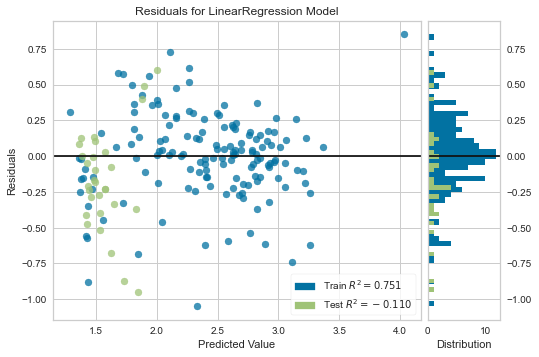

In [17]:
viz = residuals_plot(regr, 
                     df_wine_regr_X_train, 
                     df_wine_regr_y_train, 
                     df_wine_regr_X_test, 
                     df_wine_regr_y_test)           # Finalize and render the figure

### Splitting data using train_test_split

In [18]:
# Train Test split using train_test_spit()
df_wine_regr_X_train, \
df_wine_regr_X_test, \
df_wine_regr_y_train, \
df_wine_regr_y_test = train_test_split(df_wine_regr_X, df_wine_regr_y, test_size=0.2, random_state=42)

regr1 = LinearRegression()
regr1.fit(df_wine_regr_X_train,df_wine_regr_y_train)

df_wine_regr_y_pred = regr1.predict(df_wine_regr_X_test)

In [20]:
print('R2: %.2f' % regr1.score(df_wine_regr_X_test, df_wine_regr_y_test))
print('y-intercept: ', regr1.intercept_)

R2: 0.87
y-intercept:  [1.20930738]


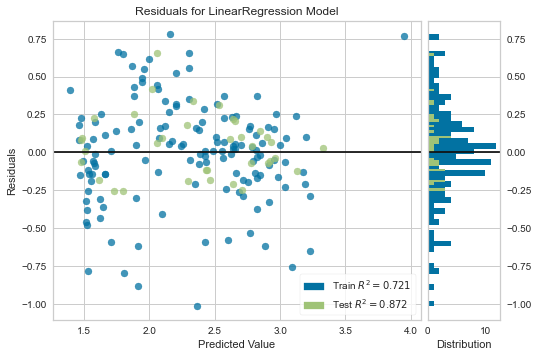

In [21]:
viz = residuals_plot(regr1, 
                     df_wine_regr_X_train, 
                     df_wine_regr_y_train, 
                     df_wine_regr_X_test, 
                     df_wine_regr_y_test)

### Observation : Splitting data manually did not provide good test cases to test the model. By using ***train_test_split()*** test cases were better

### Selecting 'hue' and 'flavanoids' with non-linear relationship

<AxesSubplot:xlabel='ash', ylabel='total_phenols'>

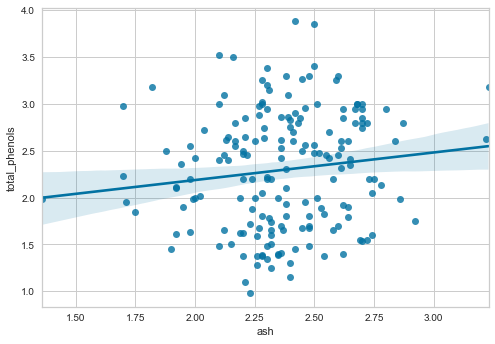

In [22]:
sns.regplot(x = df_wine['ash'], y = df_wine['total_phenols'], data = df_wine)

In [23]:
# Splitting 'hue' in train and test
df_wine_regr_X = df_wine['ash'].values.reshape(178,1)
df_wine_regr_X_train = df_wine_regr_X[:-30]
df_wine_regr_X_test = df_wine_regr_X[-30:]

# Splitting 'total_phenols' in train and test
df_wine_regr_y = df_wine['total_phenols'].values.reshape(178,1)
df_wine_regr_y_train = df_wine_regr_y[:-30]
df_wine_regr_y_test = df_wine_regr_y[-30:]

regr2 = LinearRegression()
regr2.fit(df_wine_regr_X_train,df_wine_regr_y_train)

df_wine_regr_y_pred = regr2.predict(df_wine_regr_X_test)

In [25]:
print('R2: %.2f' % regr2.score(df_wine_regr_X_test, df_wine_regr_y_test))
print('y-intercept: ', regr2.intercept_)

R2: -3.68
y-intercept:  [1.47732064]


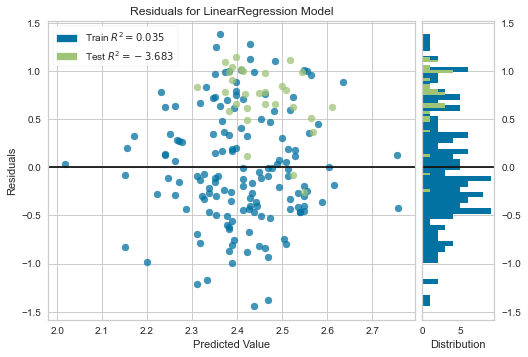

In [26]:
viz = residuals_plot(regr2, 
                     df_wine_regr_X_train, 
                     df_wine_regr_y_train, 
                     df_wine_regr_X_test, 
                     df_wine_regr_y_test)

In [27]:
# Train Test split using train_test_spit()
df_wine_regr_X_train, \
df_wine_regr_X_test, \
df_wine_regr_y_train, \
df_wine_regr_y_test = train_test_split(df_wine_regr_X, df_wine_regr_y, test_size=0.2, random_state=42)

regr3 = LinearRegression()
regr3.fit(df_wine_regr_X_train,df_wine_regr_y_train)

df_wine_regr_y_pred = regr3.predict(df_wine_regr_X_test)

In [28]:
print('R2: %.2f' % regr3.score(df_wine_regr_X_test, df_wine_regr_y_test))
print('y-intercept: ', regr1.intercept_)

R2: 0.02
y-intercept:  [1.20930738]


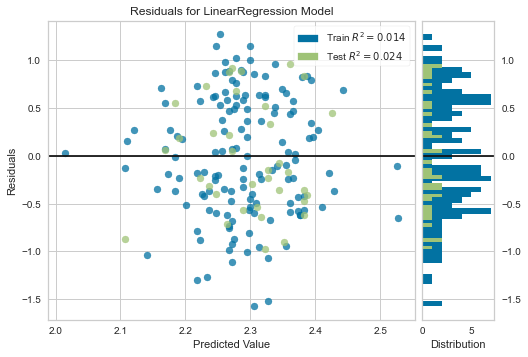

In [29]:
viz = residuals_plot(regr3, 
                     df_wine_regr_X_train, 
                     df_wine_regr_y_train, 
                     df_wine_regr_X_test, 
                     df_wine_regr_y_test)